## 绘制

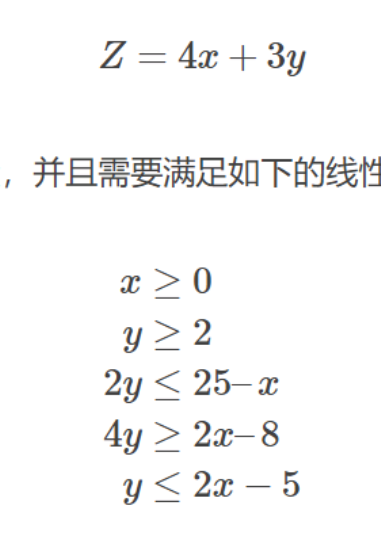

In [1]:
import numpy as np
import matplotlib.pyplot as plt

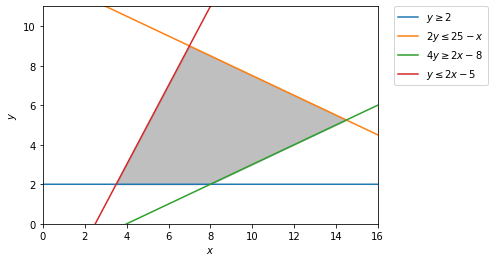

In [2]:
# Construct lines
# x > 0
x = np.linspace(0, 20, 2000)

# y >= 2
y1 = (x*0) + 2
# 2y <= 25 - x
y2 = (25-x)/2.0
# 4y >= 2x - 8
y3 = (2*x-8)/4.0
# y <= 2x - 5
y4 = 2 * x - 5

# Make plot
plt.plot(x, y1, label=r'$y\geq2$')
plt.plot(x, y2, label=r'$2y\leq25-x$')
plt.plot(x, y3, label=r'$4y\geq 2x - 8$')
plt.plot(x, y4, label=r'$y\leq 2x-5$')

# x,y 显示区域
plt.xlim((0, 16))
plt.ylim((0, 11))
# x,y 直线区域
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

# Fill feasible region
# y2,y4为小于
# y1,y3为大于
y5 = np.minimum(y2, y4)
y6 = np.maximum(y1, y3)

# 最大化Z minimum<maximum
plt.fill_between(x, y5, y6, where=y5 > y6, color='grey', alpha=0.5)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

## 绘制垂直于X轴的线

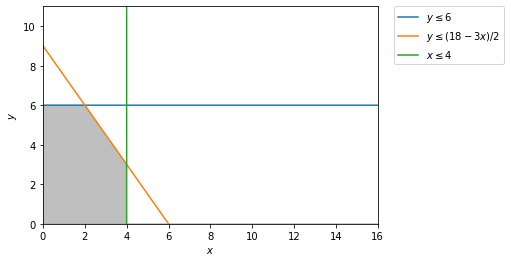

In [3]:
# Construct lines
# x > 0
x = np.linspace(0, 20, 2000)

# y <= 6
y1 = 6+0*x
# y <= (18 - 3x)/2
y2 = (18-3*x)/2
# x <= 4
y3 = 999999*(-x+4)

# Make plot
plt.plot(x, y1, label=r'$y\leq6$')
plt.plot(x, y2, label=r'$y\leq(18-3x)/2$')
plt.plot(x, y3, label=r'$x\leq4$')


# x,y 显示区域
plt.xlim((0, 16))
plt.ylim((0, 11))
# 坐标轴图例
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

# Fill feasible region
# y2,y4为小于
# y1,y3为大于
y5 = np.minimum(y1, y2)
y6 = np.minimum(y5, y3)


# 最大化Z minimum<maximum
plt.fill_between(x, y6, color='grey', alpha=0.5)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

## 获得交点的办法

[          nan           nan           nan           nan           nan
  665.99751398           nan           nan           nan           nan
           nan           nan           nan           nan 1006.19748525
           nan]
[          nan           nan           nan           nan           nan
 1099.39776259           nan           nan           nan           nan
           nan           nan           nan           nan 1405.57773673
           nan]


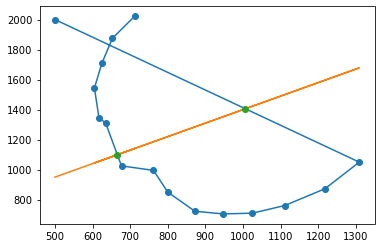

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 第一条折线
x1 = np.array([712,653,625,605,617,635,677,762,800,872,947,1025,1111,1218,1309, 500])
y1 = np.array([2022,1876,1710,1544,1347,1309,1025,995,850,723,705,710,761,873,1050, 2000])

# 第二条直线
x_start = np.min(x1)
x_end = np.max(x1)+1

x_line = x1.copy()
y_line = x_line * 0.9 + 500


# 开始处理
y=y1-y_line
nLen=len(x1)
xzero=np.zeros((nLen,))
yzero=np.zeros((nLen,))
for i in range(nLen-1):
    if np.dot(y[i], y[i+1]) == 0:#   %等于0的情况
        if y[i]==0:
            xzero[i]=i
            yzero[i]=0
        if y[i+1] == 0:
            xzero[i+1]=i+1
            yzero[i+1]=0
    elif np.dot(y[i],y[i+1]) < 0:# %一定有交点，用一次插值
        yzero[i] = np.dot(abs(y[i]) * y_line[i+1] + abs(y[i+1])*y_line[i], 1/(abs(y[i+1])+abs(y[i])))
        xzero[i] = (yzero[i]-500)/0.9
    else:
        pass            

for i in range(nLen):
    if xzero[i]==0 and (yzero[i]==0):#     %除掉不是交点的部分
        xzero[i]=np.nan
        yzero[i]=np.nan

#X点，Y点坐标数组对应
print(xzero)
print(yzero)


#画线
plt.plot(x1, y1, 'o-')
#画交点
plt.plot(x_line,y_line,xzero,yzero,'o')
plt.show()